In [ ]:
import pandas as pd
from typing import List
import yfinance as yf

# Define constants
LOCAL_PATH = "C://Users//artur//OneDrive//analytics//resources//"
SP500_FILE = "S&P 500 Historical Components & Changes(12=30=2023).csv"
SP500_LAST_PRICES = "last_sp500_prices.csv"

sp500 = pd.read_csv("S&P 500 Historical Components & Changes.csv")


# Function to read S&P 500 universe data
def read_universe_data() -> pd.DataFrame:
    df = pd.read_csv("S&P 500 Historical Components & Changes.csv", index_col='date')
    return df

# Function to fetch price data for given tickers
def fetch_universe_prices(tickers: List[str]) -> pd.DataFrame:
    print(tickers)
    prices = yf.download(tickers=tickers, start=None, end=None, ignore_tz=True)['Adj Close']
    return prices



# Function to fetch last available prices for the universe
def fetch_last_universe_prices(universe_data: pd.DataFrame) -> pd.DataFrame:
    tickers = universe_data.iloc[-1, :].apply(lambda x: sorted(x.split(','))).tolist()[0]
    prices = fetch_universe_prices(tickers=tickers)
    prices = prices.apply(pd.to_numeric, errors='coerce')
    return prices



# Function to save the prices of the last universe
def save_prices_for_last_universe():
    universe_data = read_universe_data()
    prices = fetch_last_universe_prices(universe_data=universe_data)
    prices.index.name = 'date'
    prices.to_csv("S&P 500 Historical Components & Changes.csv")

# Example usage
if __name__ == "__main__":
    # Load universe data
    universe_data = read_universe_data()
    print(universe_data)

    # Save prices to avoid fetching every time (uncomment to execute for the first time)
    save_prices_for_last_universe()

    # Check prices are uploaded
    prices = pd.read_csv("S&P 500 Historical Components & Changes.csv", index_col='date')
    print(prices)
    print(prices.describe())


    


                                                      tickers
date                                                         
1996-01-02  TMC-200006,AAL-199702,AAMRQ-201312,AAPL,ABI-20...
1996-01-03  AAL-199702,AAMRQ-201312,AAPL,ABI-200811,ABS-20...
1996-01-04  TMC-200006,AAL-199702,AAMRQ-201312,AAPL,OAT-20...
1996-01-10  TMC-200006,AAL-199702,AAMRQ-201312,AAPL,ABI-20...
1996-01-11  FLMIQ-200408,FLTWQ-200907,FMC,FMCC,FNMA,FTL.A-...
...                                                       ...
2019-01-03  A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,...
2019-01-08  A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,...
2019-01-09  KMI,KMX,KO,KR,KSS,KSU,L,LB,LEG,LEN,LH,LKQ,LLL,...
2019-01-10  TIF,TJX,TMK,TMO,TPR,TRIP,TROW,TRV,TSCO,TSN,TSS...
2019-01-11  JPM,JWN,K,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO...

[2595 rows x 1 columns]
['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG

[*********************100%***********************]  504 of 504 completed

62 Failed downloads:
['APC', 'KSU', 'XLNX', 'TSS', 'COG', 'JEC', 'BRK.B', 'CBS', 'FBHS', 'DISCK', 'BHGE', 'TMK', 'MXIM', 'RE', 'RHT', 'PBCT', 'CXO', 'FLT', 'CELG', 'ANTM', 'CTL', 'CTXS', 'VAR', 'ADS', 'DISH', 'FRC', 'MYL', 'NLSN', 'GPS', 'DRE', 'ALXN', 'TIF', 'FLIR', 'PKI', 'UTX', 'ABMD', 'TWTR', 'ATVI', 'HFC', 'RTN', 'VIAB', 'NBL', 'AGN', 'ARNC', 'WLTW', 'CERN', 'LLL', 'ETFC', 'WRK', 'DWDP', 'DISCA', 'BBT', 'FB', 'PXD', 'BLL', 'XEC', 'ABC', 'HRS', 'SYMC', 'WCG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 1925-12-13 -> 2024-11-18)')
['SIVB']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


                                    A    AAL        AAP        AAPL  \
date                                                                  
1962-01-02 00:00:00+00:00         NaN    NaN        NaN         NaN   
1962-01-03 00:00:00+00:00         NaN    NaN        NaN         NaN   
1962-01-04 00:00:00+00:00         NaN    NaN        NaN         NaN   
1962-01-05 00:00:00+00:00         NaN    NaN        NaN         NaN   
1962-01-08 00:00:00+00:00         NaN    NaN        NaN         NaN   
...                               ...    ...        ...         ...   
2024-11-12 00:00:00+00:00  133.669998  13.91  39.910000  224.229996   
2024-11-13 00:00:00+00:00  134.279999  14.01  40.939999  225.119995   
2024-11-14 00:00:00+00:00  130.220001  14.26  41.200001  228.220001   
2024-11-15 00:00:00+00:00  127.070000  14.39  37.689999  225.000000   
2024-11-18 00:00:00+00:00  126.919998  14.29  40.090000  228.020004   

                                 ABBV  ABC  ABMD         ABT         ACN  \


In [33]:
import numpy as np

#By applying .shift(), you create a lagged time series, which allows the computation of historical
# ratios without using data from the future. This is crucial for backtesting because using
#  future data would lead to lookahead bias, invalidating the results.
def compute_momentum(prices: pd.DataFrame) -> pd.DataFrame:
    return (prices.shift(1) / prices.shift(12)) - 1

#Here, set the cut-off number (alpha,... = 5%, 10%..) and slice the rank into top alpha performers(size = alpha*n)
def rank_and_slice(momentum: pd.DataFrame, alpha: float):
    rank = momentum.rank(axis=1, ascending=False)
    n = momentum.shape[1]
    top_n = int(alpha * n)
    bottom_n = n - top_n
    return rank <= top_n, rank > bottom_n

def backtest(prices: pd.DataFrame, alpha: float):
    momentum = compute_momentum(prices)
    long_mask, short_mask = rank_and_slice(momentum, alpha)
    weights = np.where(long_mask, 1 / long_mask.sum(axis=1, keepdims=True), 0) - \
              np.where(short_mask, 1 / short_mask.sum(axis=1, keepdims=True), 0)
    returns = prices.pct_change()
    portfolio_returns = (weights.shift(1) * returns).sum(axis=1)
    return portfolio_returns.cumsum()


In [34]:
# Index is already provided as datetime with timezone info, so we ensure the index is parsed properly.
prices.index = pd.to_datetime(prices.index)

# Step 1: Filter for the last 10 years of data
last_10_years = prices[prices.index >= (prices.index.max() - pd.DateOffset(years=10))]
last_10_years

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2014-11-18 00:00:00+00:00,37.551533,42.685024,131.495819,25.714510,43.668964,NaN,NaN,36.116974,71.464035,70.830002,...,24.615377,NaN,61.362022,48.233238,20.202684,33.754284,44.344032,99.984154,22.602846,41.097343
2014-11-19 00:00:00+00:00,37.551533,41.784897,130.147018,25.536362,43.305340,NaN,NaN,35.893814,70.904526,70.820000,...,24.505880,NaN,61.840633,48.360390,19.906237,32.985733,44.212517,99.132256,22.353437,40.362633
2014-11-20 00:00:00+00:00,37.974903,41.841747,130.551605,25.901579,43.100380,NaN,NaN,36.183086,70.734985,70.440002,...,24.498577,NaN,61.976471,48.596512,20.069288,33.091751,45.133007,98.746666,22.595055,40.130135
2014-11-21 00:00:00+00:00,38.886086,41.036377,130.821396,25.937210,44.535076,NaN,NaN,36.207893,71.277527,71.320000,...,24.586176,NaN,62.616814,48.950714,20.128576,33.789619,45.342197,99.069481,22.743145,40.799744
2014-11-24 00:00:00+00:00,38.886086,40.941624,130.902313,26.418228,44.812763,NaN,NaN,36.629383,71.998108,71.220001,...,24.367182,NaN,61.911777,49.477444,20.276796,33.922131,45.658981,98.710808,22.860054,41.460056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,133.669998,13.910000,39.910000,224.229996,171.089996,NaN,NaN,116.440002,360.609985,526.419983,...,68.610001,NaN,119.369125,17.770000,8.670000,124.790001,134.610001,109.940002,59.263714,173.960007
2024-11-13 00:00:00+00:00,134.279999,14.010000,40.939999,225.119995,170.350006,NaN,NaN,115.739998,370.220001,532.500000,...,68.650002,NaN,120.480003,17.350000,8.270000,123.730003,135.259995,109.970001,59.779999,177.039993
2024-11-14 00:00:00+00:00,130.220001,14.260000,41.200001,228.220001,169.630005,NaN,NaN,115.029999,362.070007,529.869995,...,68.910004,NaN,120.559998,17.870001,8.390000,121.629997,136.740005,108.849998,59.599998,174.630005


In [36]:
def backtest(prices: pd.DataFrame, alpha: float):
    """
    Backtest a momentum strategy by computing portfolio returns.
    """
    # Step 1: Compute momentum
    momentum = compute_momentum(prices)
    
    # Step 2: Rank and slice into long and short positions
    long_mask, short_mask = rank_and_slice(momentum, alpha)

    # Step 3: Normalize weights using numpy (to handle `keepdims`)
    long_weights = np.where(long_mask, 1 / np.nansum(long_mask, axis=1, keepdims=True), 0)
    short_weights = np.where(short_mask, 1 / np.nansum(short_mask, axis=1, keepdims=True), 0)
    weights = long_weights - short_weights

    # Convert weights to pandas DataFrame for compatibility with `shift`
    weights = pd.DataFrame(weights, index=prices.index, columns=prices.columns)

    # Step 4: Compute portfolio returns
    returns = prices.pct_change()
    portfolio_returns = (weights.shift(1) * returns).sum(axis=1)
    
    # Step 5: Return cumulative portfolio returns
    return portfolio_returns


In [41]:
# Step 1: Resample prices to monthly frequency and forward-fill missing values to simulate end-of-month prices
monthly_prices = last_10_years.resample('M').ffill()

# Step 2: Compute momentum using the provided compute_momentum function
momentum = compute_momentum(monthly_prices)

# Step 3: Backtest the momentum strategy
monthly_returns = backtest(monthly_prices, alpha=0.1)

cumulative_returns = monthly_returns.cumsum()
cumulative_returns

# Temporarily disable truncation
with pd.option_context('display.max_rows', None):
    print(cumulative_returns)

date
2014-11-30 00:00:00+00:00    0.000000
2014-12-31 00:00:00+00:00    0.000000
2015-01-31 00:00:00+00:00    0.000000
2015-02-28 00:00:00+00:00    0.000000
2015-03-31 00:00:00+00:00    0.000000
2015-04-30 00:00:00+00:00    0.000000
2015-05-31 00:00:00+00:00    0.000000
2015-06-30 00:00:00+00:00    0.000000
2015-07-31 00:00:00+00:00    0.000000
2015-08-31 00:00:00+00:00    0.000000
2015-09-30 00:00:00+00:00    0.000000
2015-10-31 00:00:00+00:00    0.000000
2015-11-30 00:00:00+00:00    0.000000
2015-12-31 00:00:00+00:00   -0.012246
2016-01-31 00:00:00+00:00   -0.070956
2016-02-29 00:00:00+00:00   -0.074881
2016-03-31 00:00:00+00:00   -0.002523
2016-04-30 00:00:00+00:00   -0.013254
2016-05-31 00:00:00+00:00    0.034728
2016-06-30 00:00:00+00:00    0.073918
2016-07-31 00:00:00+00:00    0.107421
2016-08-31 00:00:00+00:00    0.082966
2016-09-30 00:00:00+00:00    0.086284
2016-10-31 00:00:00+00:00    0.045732
2016-11-30 00:00:00+00:00    0.083875
2016-12-31 00:00:00+00:00    0.092423
2017-01

C:\Users\sherr\AppData\Local\Temp\ipykernel_19776\2614778785.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = last_10_years.resample('M').ffill()
C:\Users\sherr\AppData\Local\Temp\ipykernel_19776\402115541.py:12: RuntimeWarning: divide by zero encountered in divide
  long_weights = np.where(long_mask, 1 / np.nansum(long_mask, axis=1, keepdims=True), 0)
C:\Users\sherr\AppData\Local\Temp\ipykernel_19776\402115541.py:13: RuntimeWarning: divide by zero encountered in divide
  short_weights = np.where(short_mask, 1 / np.nansum(short_mask, axis=1, keepdims=True), 0)
C:\Users\sherr\AppData\Local\Temp\ipykernel_19776\402115541.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change()


In [47]:
import pandas as pd
import numpy as np

def compute_momentum3(prices: pd.DataFrame) -> pd.DataFrame:
    return (prices.shift(1) / prices.shift(12)) - 1

def rank_and_slice3(momentum: pd.DataFrame, alpha: float):
    rank = momentum.rank(axis=1, ascending=False)
    n = momentum.shape[1]
    top_n = int(alpha * n)
    bottom_n = n - top_n
    return rank <= top_n, rank > bottom_n

def backtest3(prices: pd.DataFrame, alpha: float):
    # Calculate momentum
    momentum = compute_momentum(prices)
    long_mask, short_mask = rank_and_slice(momentum, alpha)

    # Calculate weights for the long and short positions
    long_weights = long_mask.div(long_mask.sum(axis=1), axis=0).fillna(0)
    short_weights = short_mask.div(short_mask.sum(axis=1), axis=0).fillna(0)
    weights = long_weights - short_weights

    # Daily returns
    returns = prices.pct_change()
    portfolio_returns = (weights.shift(1) * returns).sum(axis=1)

    # Cumulative returns
    cumulative_returns = (1 + portfolio_returns).cumprod()

    # Monthly returns
    monthly_returns = portfolio_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)

    # Annual returns
    annual_returns = portfolio_returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)

    return cumulative_returns, monthly_returns, annual_returns



C:\Users\sherr\AppData\Local\Temp\ipykernel_19776\3082448920.py:25: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change()
C:\Users\sherr\AppData\Local\Temp\ipykernel_19776\3082448920.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = portfolio_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
C:\Users\sherr\AppData\Local\Temp\ipykernel_19776\3082448920.py:35: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = portfolio_returns.resample('Y').apply(lambda x: (1 + x).prod() - 1)


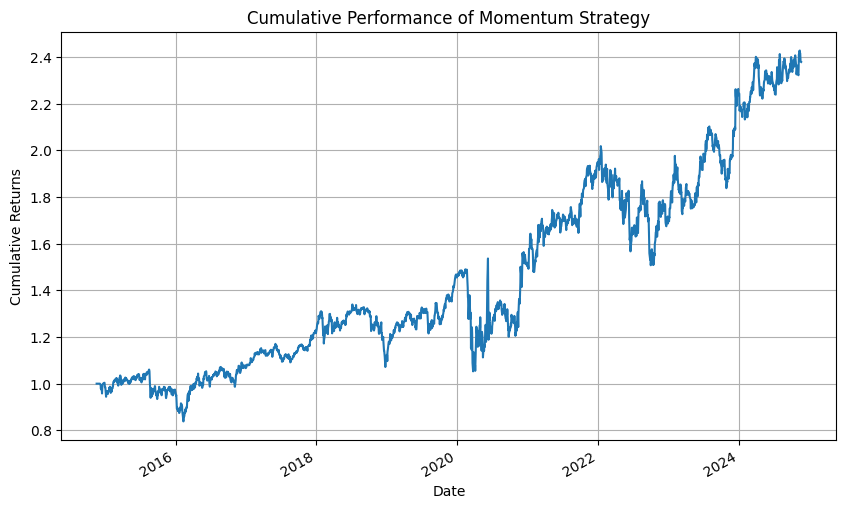

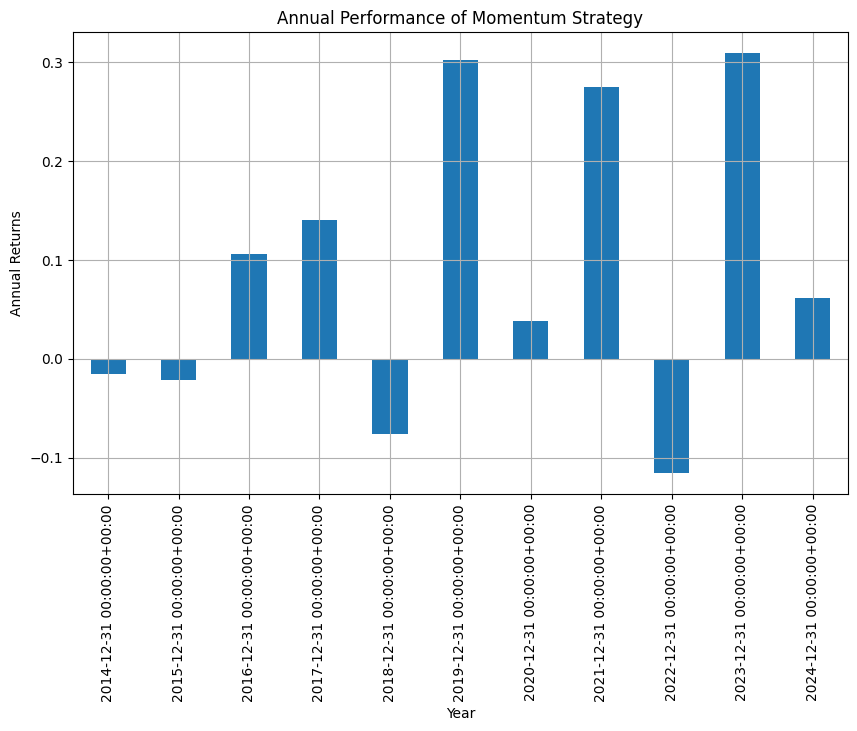

date
2014-12-31 00:00:00+00:00   -0.015406
2015-12-31 00:00:00+00:00   -0.021080
2016-12-31 00:00:00+00:00    0.106490
2017-12-31 00:00:00+00:00    0.140431
2018-12-31 00:00:00+00:00   -0.076129
2019-12-31 00:00:00+00:00    0.302197
2020-12-31 00:00:00+00:00    0.037906
2021-12-31 00:00:00+00:00    0.274901
2022-12-31 00:00:00+00:00   -0.115786
2023-12-31 00:00:00+00:00    0.309353
2024-12-31 00:00:00+00:00    0.061530
Freq: YE-DEC, dtype: float64

In [51]:
# Assume `prices` is your DataFrame of daily prices.
alpha = 0.1  # Top 10%
cumulative_returns, monthly_returns, annual_returns = backtest3(last_10_years, alpha)

# Plot cumulative returns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cumulative_returns.plot(title='Cumulative Performance of Momentum Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

# Plot annual returns
plt.figure(figsize=(10, 6))
annual_returns.plot(kind='bar', title='Annual Performance of Momentum Strategy')
plt.xlabel('Year')
plt.ylabel('Annual Returns')
plt.grid()
plt.show()
#cumulative_returns, monthly_returns, annual_returns
annual_returns